Importações

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [60]:
# Função para gerar gráficos de comparação
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true.to_numpy(), label='Real')
    plt.plot(y_pred, label='Predito')
    plt.title(title)
    plt.xlabel('Amostra')
    plt.ylabel('Casos de Dengue')
    plt.legend()
    plt.show()

Tratamento de dados e normatização

In [10]:
# Carregar os dados
file_path = r'C:\Users\Priscilla\Downloads\dengue_es.csv'
data = pd.read_csv(file_path)

# Converter a coluna de data para o formato datetime
data['Data Medicao'] = pd.to_datetime(data['Data Medicao'])

# Substituir vírgulas por pontos e converter as colunas para float
columns_to_convert = [
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)',
    'Qtd Dengue',
    'GOOGLE TRENDS'
]

for column in columns_to_convert:
    data[column] = data[column].str.replace(',', '.').astype(float)

# Definir a coluna de data como índice
data.set_index('Data Medicao', inplace=True)

# Agregar os dados semanalmente
weekly_data = data.resample('W').agg({
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'sum',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)': 'mean',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)': 'mean',
    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)': 'mean',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)': 'mean',
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)': 'mean',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)': 'mean',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)': 'mean',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)': 'mean',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)': 'mean',
    'Qtd Dengue': 'sum',
    'GOOGLE TRENDS': 'mean'
})

# Resetar o índice para ter a data como uma coluna novamente
weekly_data.reset_index(inplace=True)

# Normalizar os dados (exceto a coluna de data e casos de dengue)
scaler = StandardScaler()
features_to_scale = weekly_data.columns.difference(['Data Medicao', 'Qtd Dengue'])
weekly_data[features_to_scale] = scaler.fit_transform(weekly_data[features_to_scale])


Treino e teste

In [ ]:
# Selecionar as features e o target
X = weekly_data[features_to_scale]
y = weekly_data['Qtd Dengue']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Prever nos dados de teste
y_pred = model.predict(X_test)

Regressão Linear/Logística

Erro Quadrático Médio (MSE) no conjunto de teste: 1909247.10
Coeficiente de Determinação (R²) no conjunto de teste: 0.33
Erro Quadrático Médio (MSE) médio na validação cruzada: 1301906.07
Desvio Padrão do MSE na validação cruzada: 488381.43
                                              Feature  Coefficient
0                                       GOOGLE TRENDS  1582.267647
1                PRECIPITACAO TOTAL, DIARIO (AUT)(mm)   128.942589
2          PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)   136.596778
3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (...  -226.739442
4                TEMPERATURA MAXIMA, DIARIA (AUT)(°C)   858.857688
5                 TEMPERATURA MEDIA, DIARIA (AUT)(°C)  -790.280768
6                TEMPERATURA MINIMA, DIARIA (AUT)(°C)   443.403887
7       UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  -444.973964
8      UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)   493.243747
9              VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)  -261.553657
10          VENTO, VEL

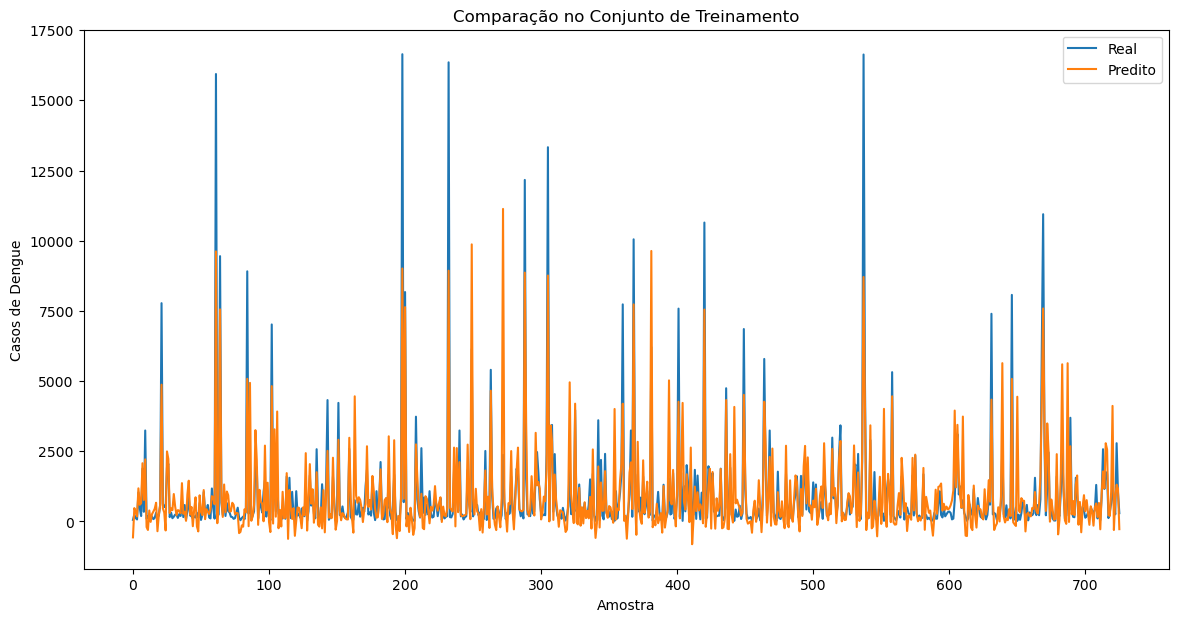

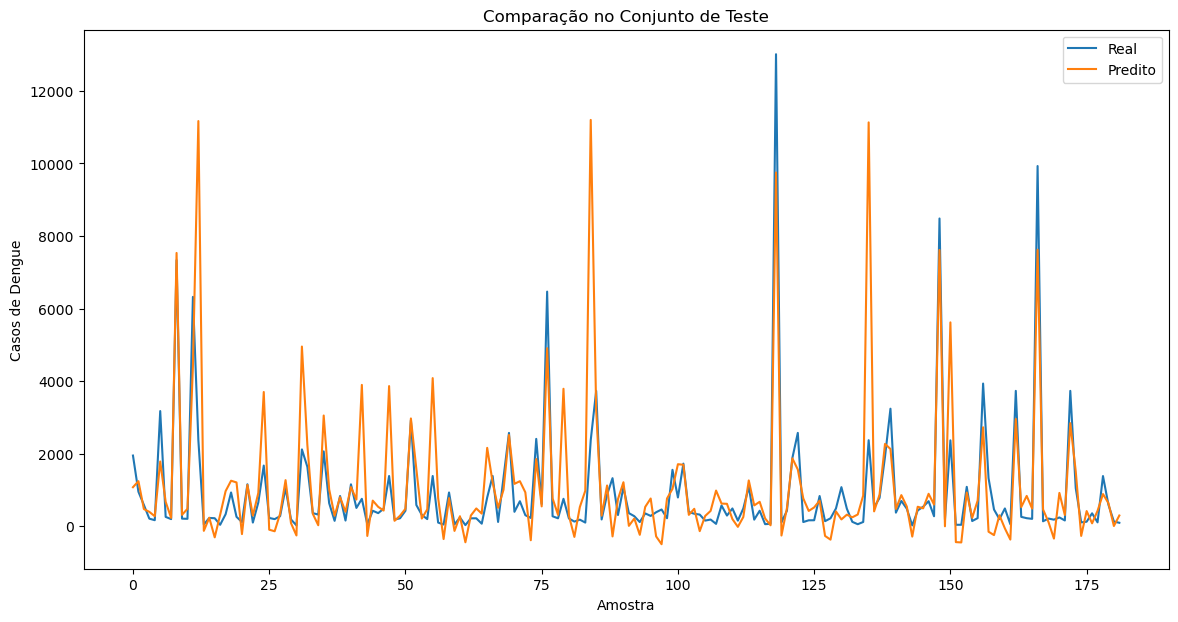

In [59]:
# Selecionar as features e o target
X = weekly_data[features_to_scale]
y = weekly_data['Qtd Dengue']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Prever nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os resultados
cv_scores_mean = -cv_scores.mean()
cv_scores_std = cv_scores.std()

print(f"Erro Quadrático Médio (MSE) no conjunto de teste: {mse:.2f}")
print(f"Coeficiente de Determinação (R²) no conjunto de teste: {r2:.2f}")
print(f"Erro Quadrático Médio (MSE) médio na validação cruzada: {cv_scores_mean:.2f}")
print(f"Desvio Padrão do MSE na validação cruzada: {cv_scores_std:.2f}")

# Imprimir os coeficientes do modelo
coefficients = pd.DataFrame({'Feature': features_to_scale, 'Coefficient': model.coef_})
print(coefficients)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
# Avaliar o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
plot_predictions(y_train, y_pred_train, 'Comparação no Conjunto de Treinamento')
plot_predictions(y_test, y_pred_test, 'Comparação no Conjunto de Teste')


Random Forest

Erro Quadrático Médio (MSE) no conjunto de teste (Random Forest): 879097.91
Coeficiente de Determinação (R²) no conjunto de teste (Random Forest): 0.69
Melhores hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (Train): 97089.7745853933
Mean Squared Error (Test): 879097.9098551413


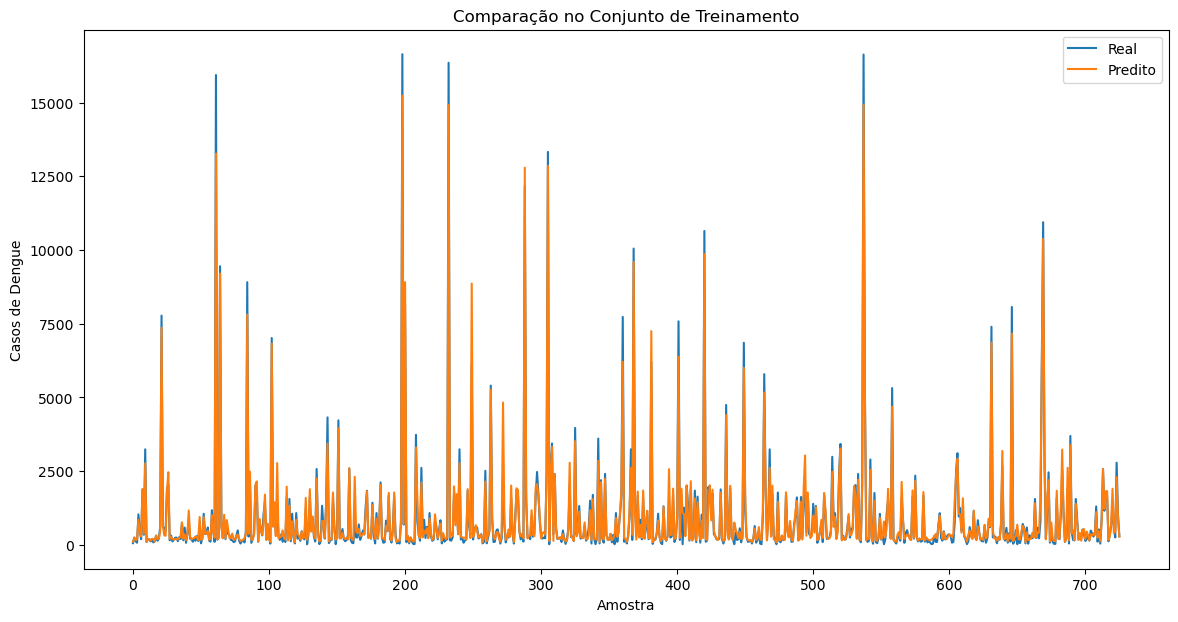

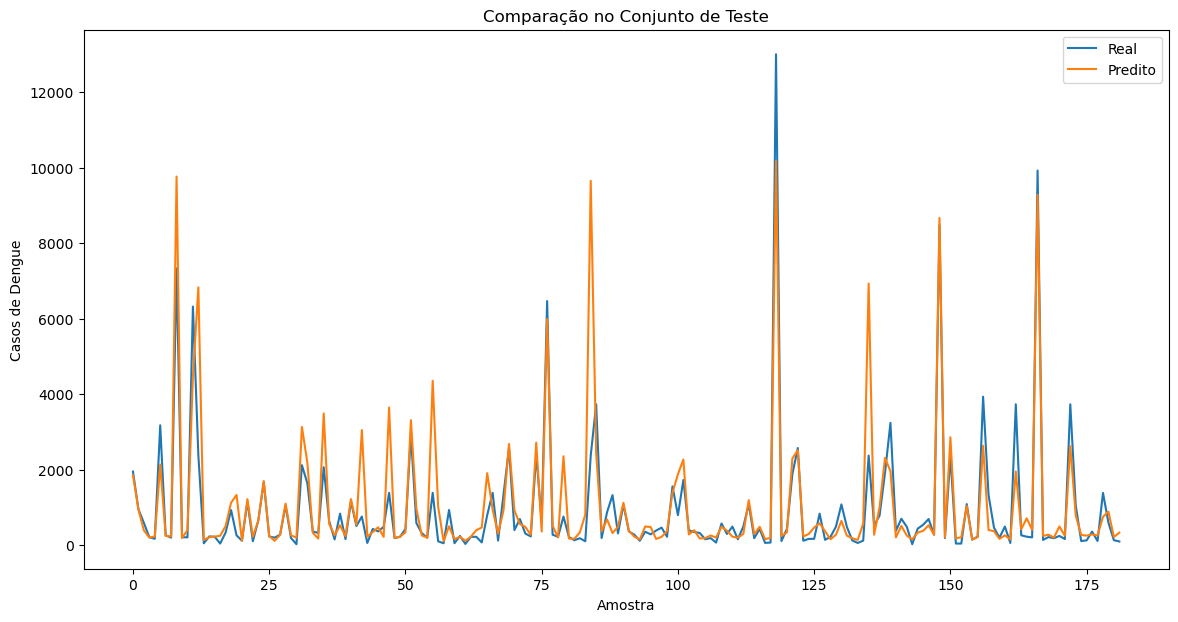

In [63]:
# Definir o modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir a grade de hiperparâmetros para busca
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicar Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = grid_search.best_estimator_

# Prever nos dados de teste
y_pred_rf = best_rf_model.predict(X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Erro Quadrático Médio (MSE) no conjunto de teste (Random Forest): {mse_rf:.2f}")
print(f"Coeficiente de Determinação (R²) no conjunto de teste (Random Forest): {r2_rf:.2f}")
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

y_pred_test = best_rf_model.predict(X_test)
y_pred_train = best_rf_model.predict(X_train)

# Avaliar o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
plot_predictions(y_train, y_pred_train, 'Comparação no Conjunto de Treinamento')
plot_predictions(y_test, y_pred_test, 'Comparação no Conjunto de Teste')


Gradient Boosting

Erro Quadrático Médio (MSE) no conjunto de teste (Gradient Boosting): 678645.56
Coeficiente de Determinação (R²) no conjunto de teste (Gradient Boosting): 0.76
Melhores hiperparâmetros: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error (Train): 4137.216756610073
Mean Squared Error (Test): 678645.5601462373


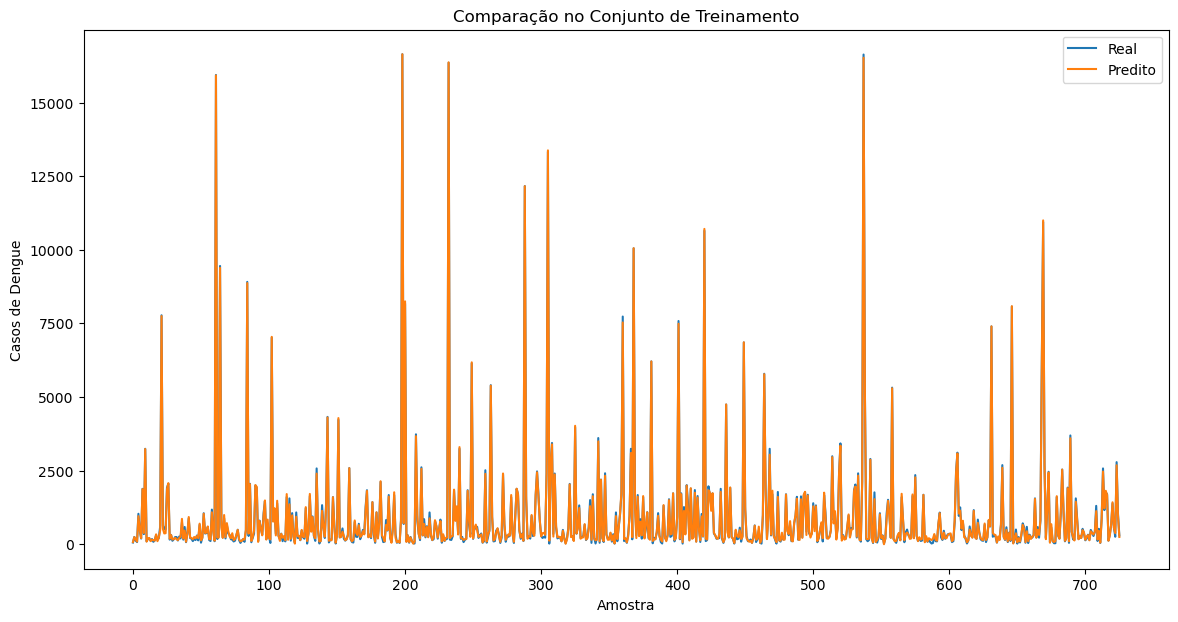

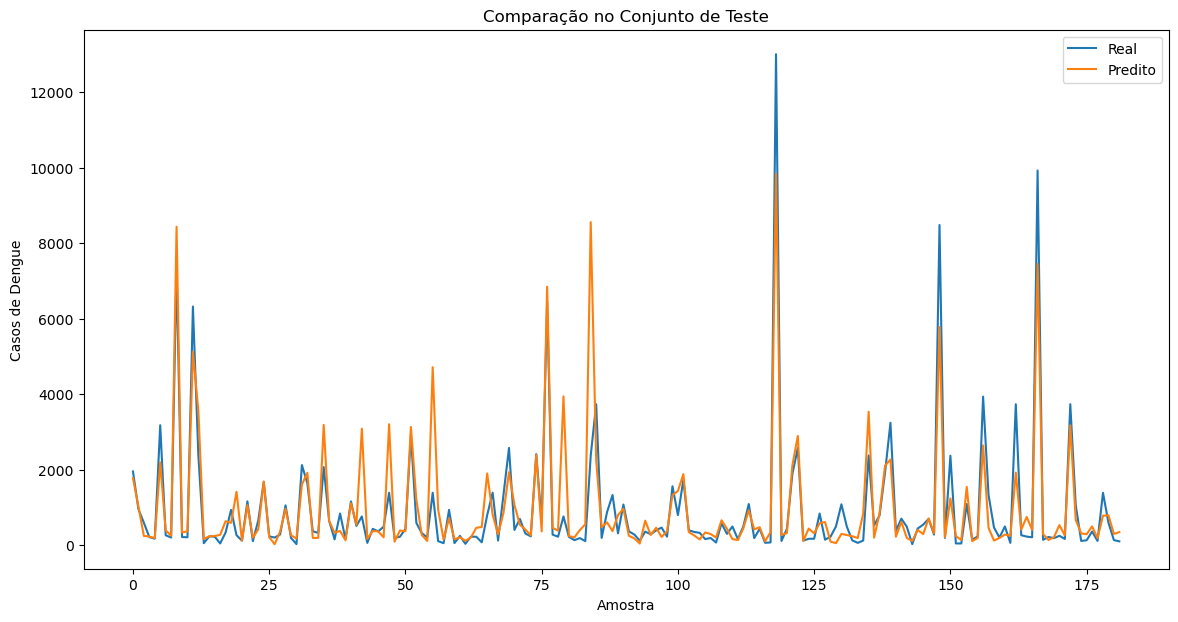

In [64]:
# Definir o modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Erro Quadrático Médio (MSE) no conjunto de teste (Gradient Boosting): {mse_gb:.2f}")
print(f"Coeficiente de Determinação (R²) no conjunto de teste (Gradient Boosting): {r2_gb:.2f}")
print(f"Melhores hiperparâmetros: {grid_search_gb.best_params_}")


y_pred_test = best_gb_model.predict(X_test)
y_pred_train = best_gb_model.predict(X_train)

# Avaliar o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
plot_predictions(y_train, y_pred_train, 'Comparação no Conjunto de Treinamento')
plot_predictions(y_test, y_pred_test, 'Comparação no Conjunto de Teste')

MLPRegressor

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
52 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit

MLP Regressor - MSE: 957541.69, R²: 0.66, Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Mean Squared Error (Train): 391141.25850450894
Mean Squared Error (Test): 957541.6909745907


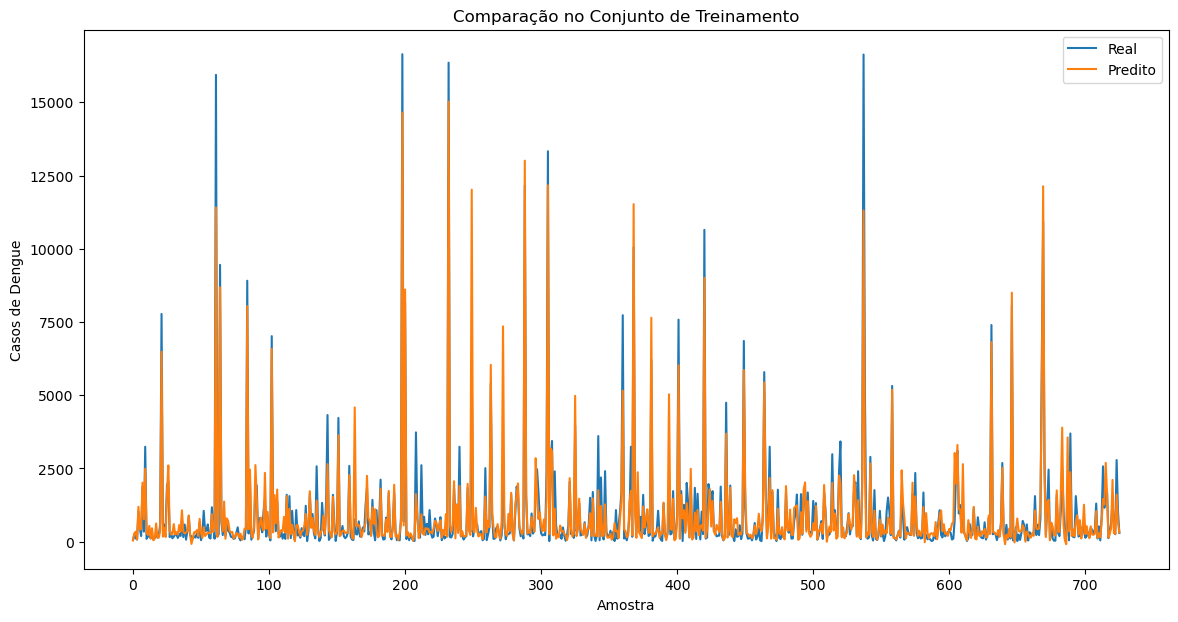

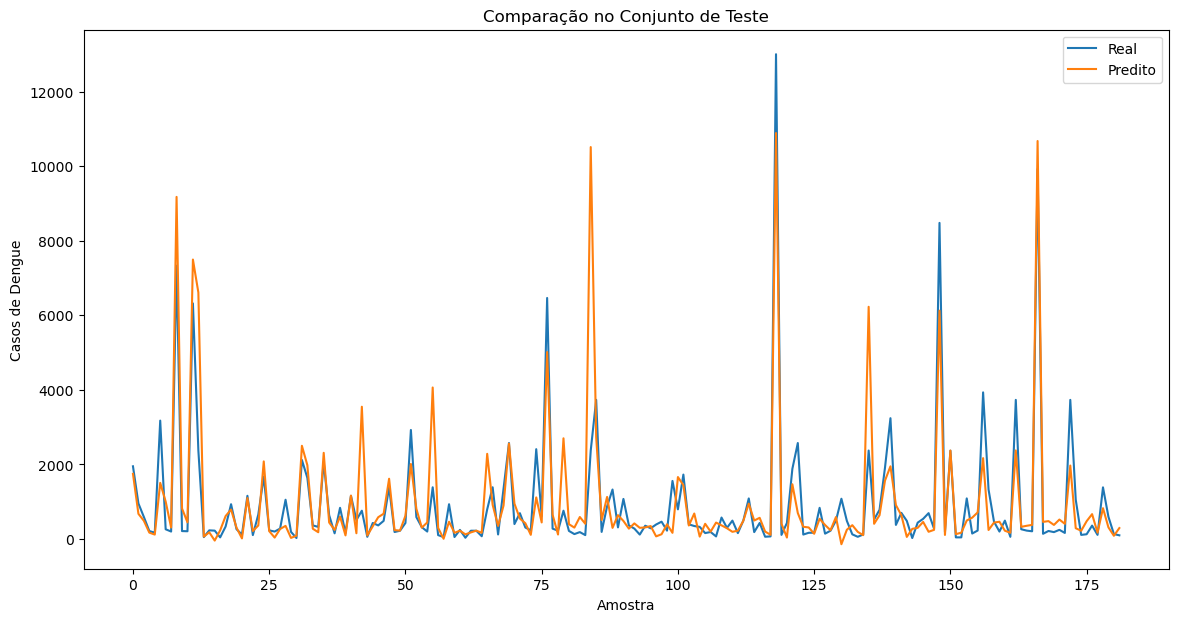

In [66]:
# Definir o modelo MLPRegressor
mlp_model = MLPRegressor(random_state=42, max_iter=1000)

# Definir a grade de hiperparâmetros para busca
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Aplicar Grid Search com validação cruzada
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train, y_train)

# Melhor modelo encontrado
best_mlp_model = grid_search_mlp.best_estimator_

# Prever nos dados de teste
y_pred_mlp = best_mlp_model.predict(X_test)

# Avaliar o modelo
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor - MSE: {mse_mlp:.2f}, R²: {r2_mlp:.2f}, Best Params: {grid_search_mlp.best_params_}")

y_pred_test = best_mlp_model.predict(X_test)
y_pred_train = best_mlp_model.predict(X_train)
# Avaliar o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
plot_predictions(y_train, y_pred_train, 'Comparação no Conjunto de Treinamento')
plot_predictions(y_test, y_pred_test, 'Comparação no Conjunto de Teste')

Resultados

In [73]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'MLP Regressor'],
    'MSE': [mse, mse_rf, mse_gb, mse_mlp],
    'R²': [r2, r2_rf, r2_gb, r2_mlp]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE        R²
0  Linear Regression  1.909247e+06  0.327450
1      Random Forest  8.790979e+05  0.690329
2  Gradient Boosting  6.786456e+05  0.760941
3      MLP Regressor  9.575417e+05  0.662697


Gráfico de linhas para as variáveis ao longo do tempo:

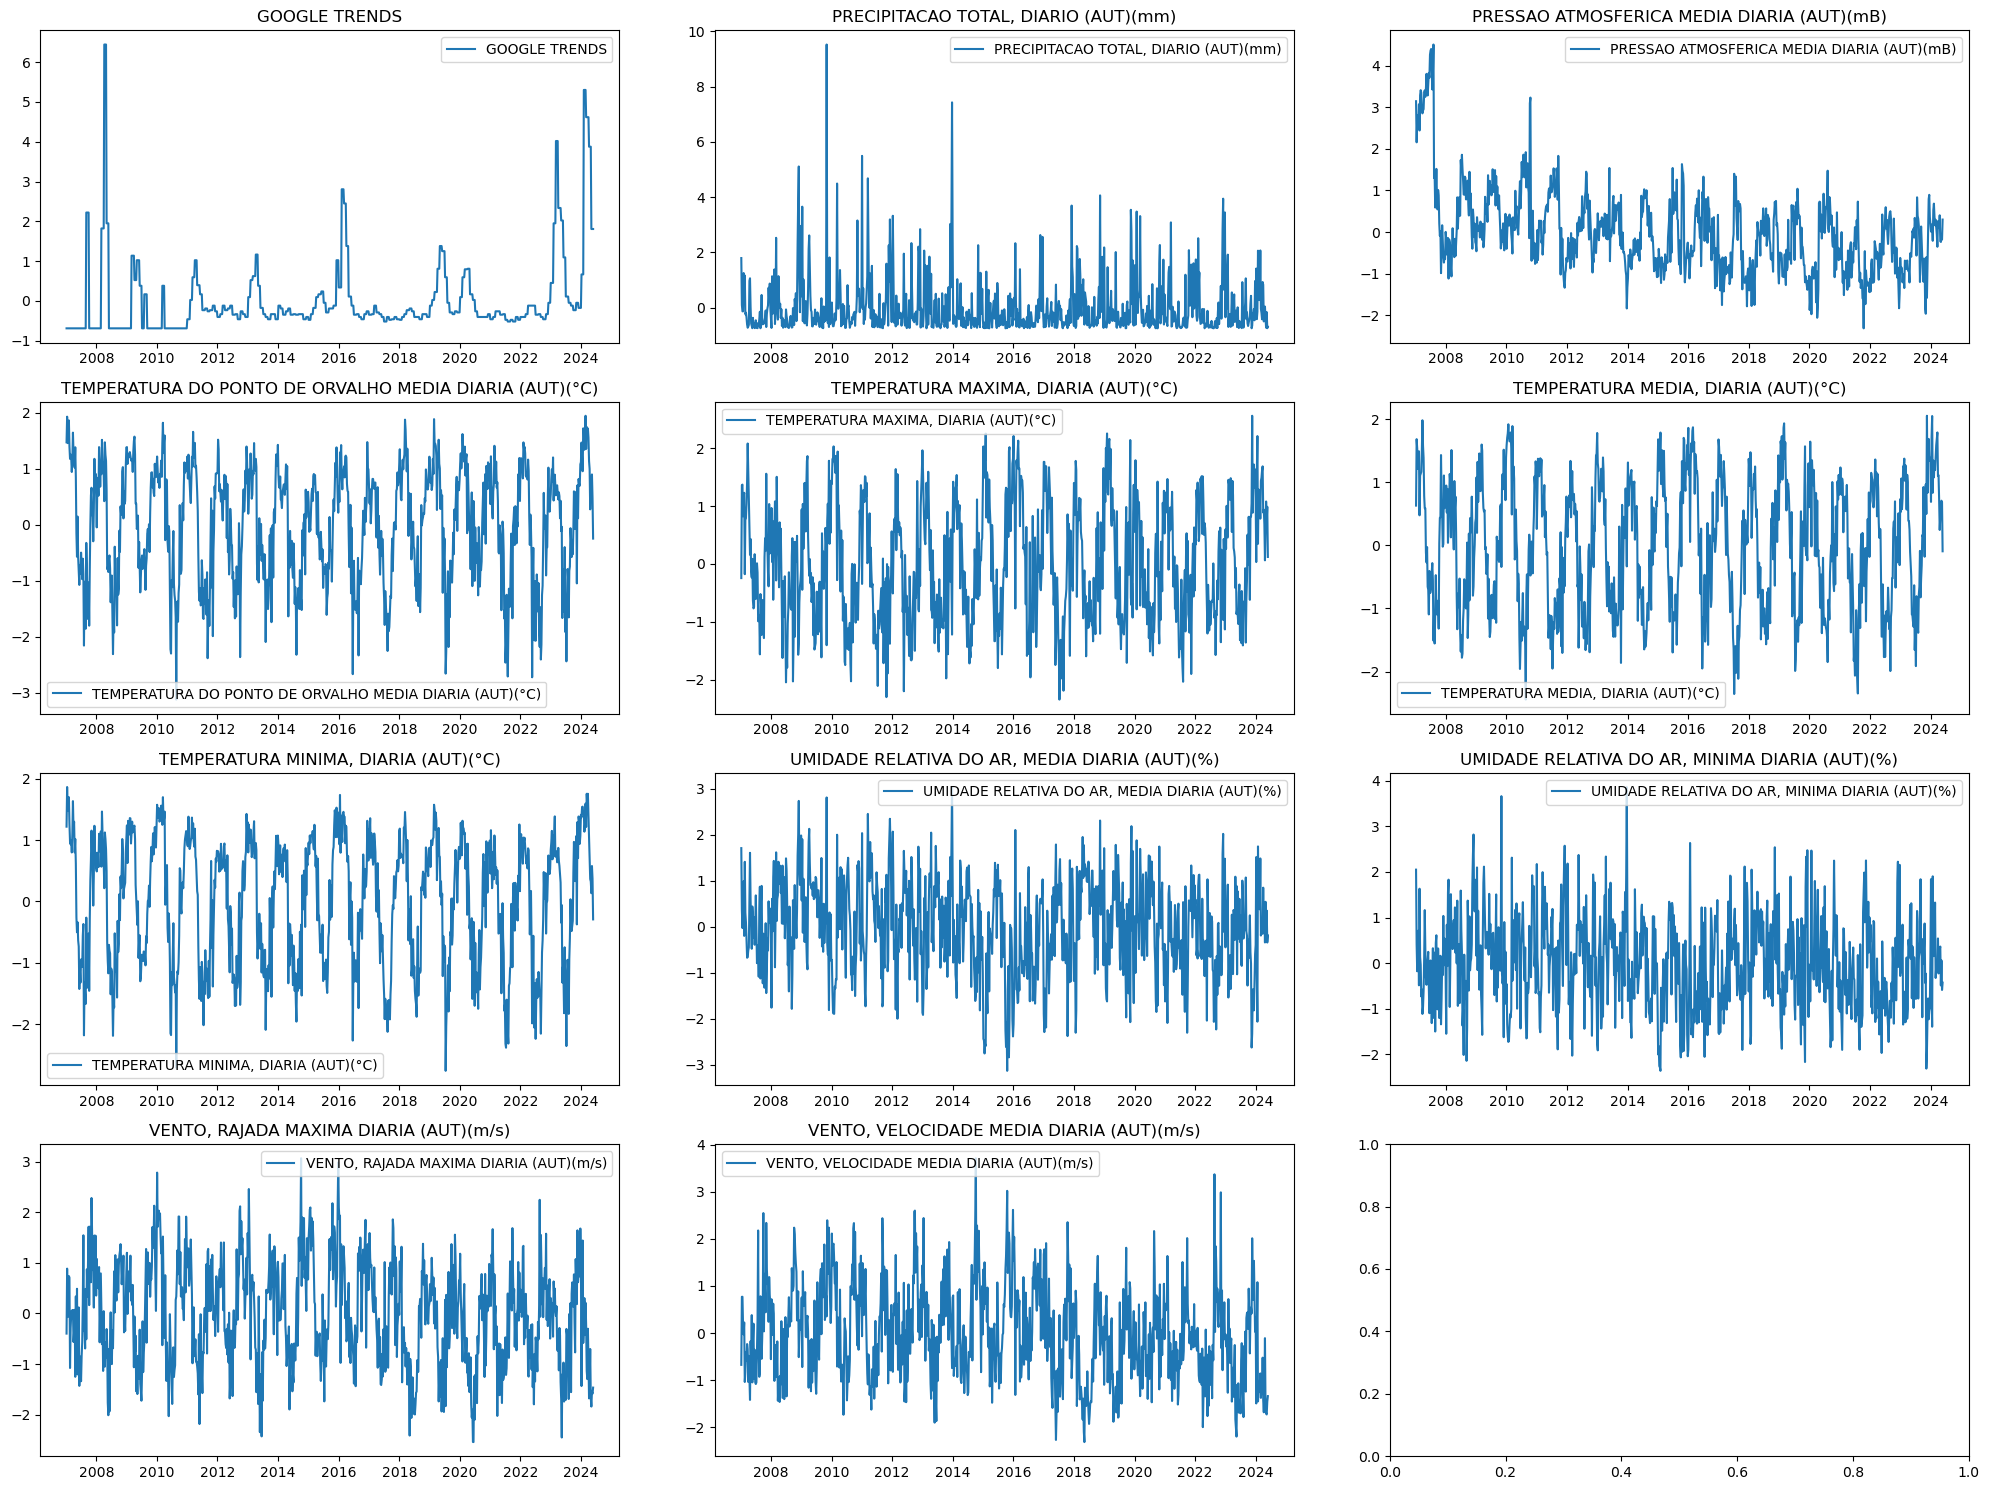

In [35]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axs = axs.flatten()

for i, col in enumerate(features_to_scale):
    axs[i].plot(weekly_data['Data Medicao'], weekly_data[col], label=col)
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()


Heatmap de correlação:

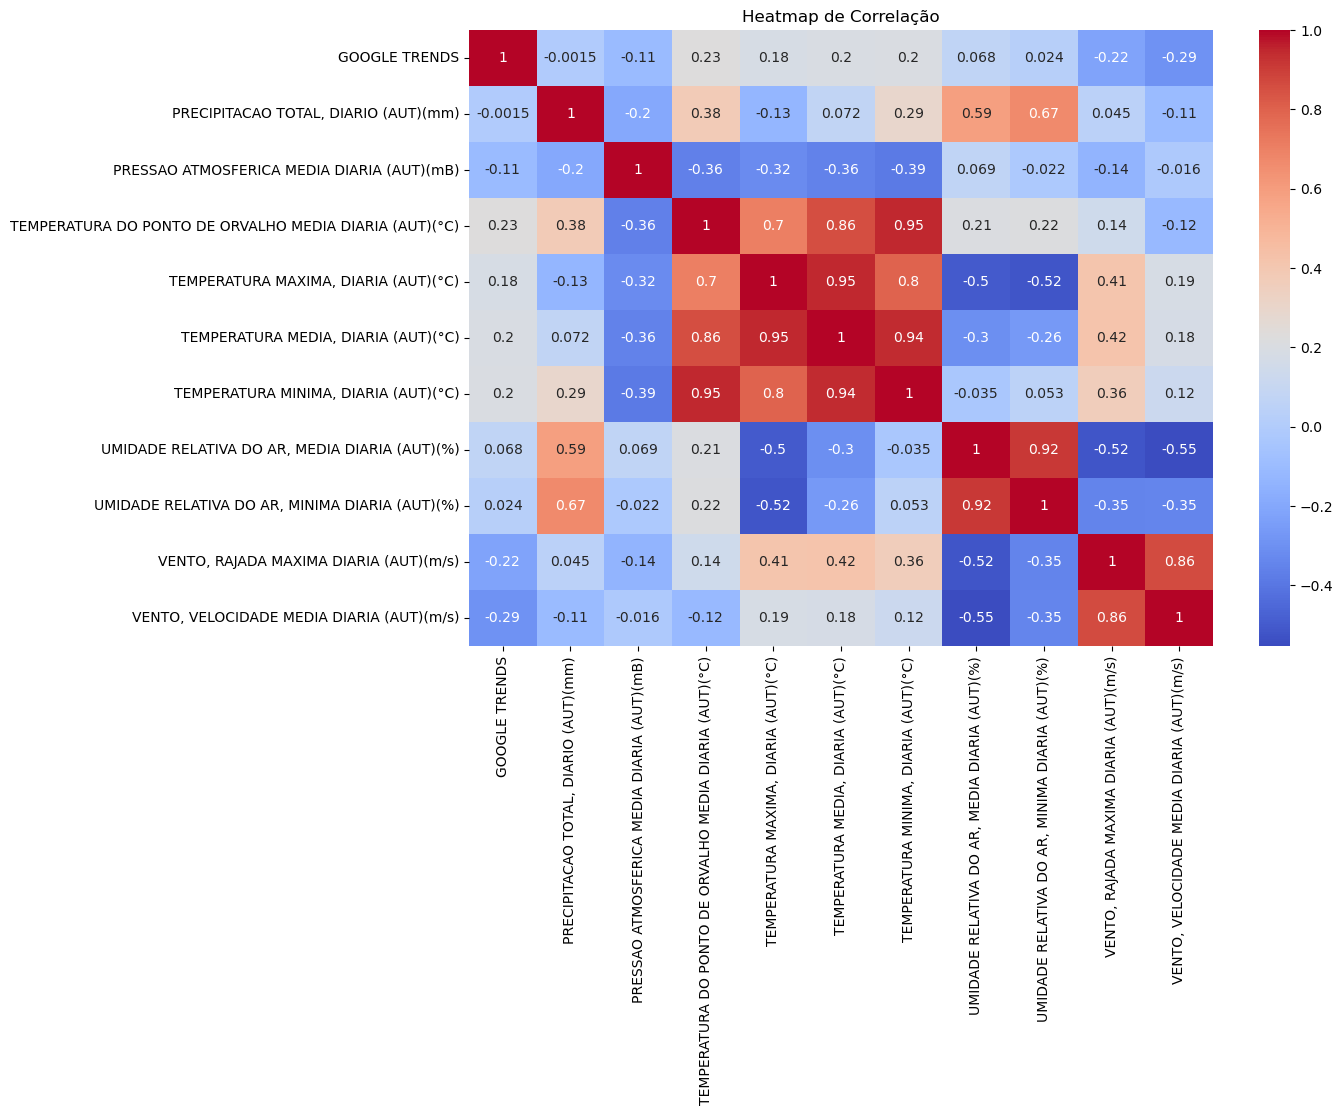

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(weekly_data[features_to_scale].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()


Gráfico de Barras para MSE:

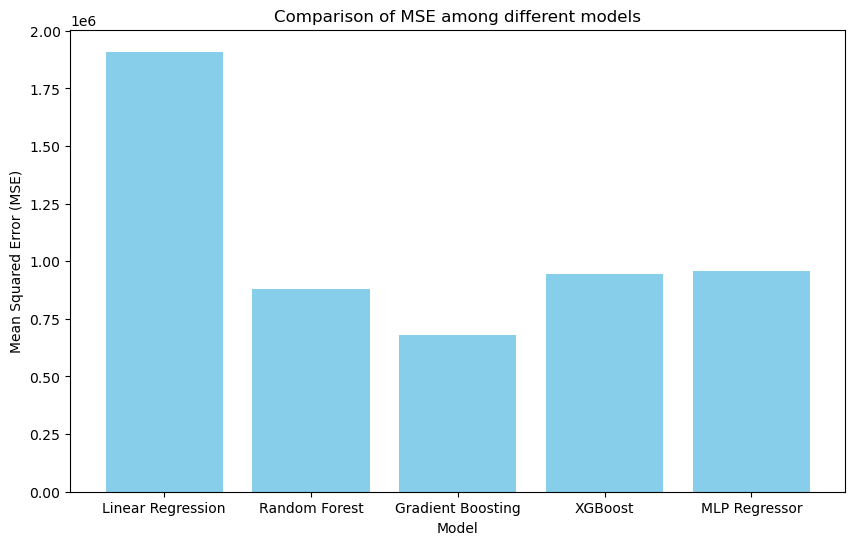

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE among different models')
plt.show()


Gráfico de Barras para R²:

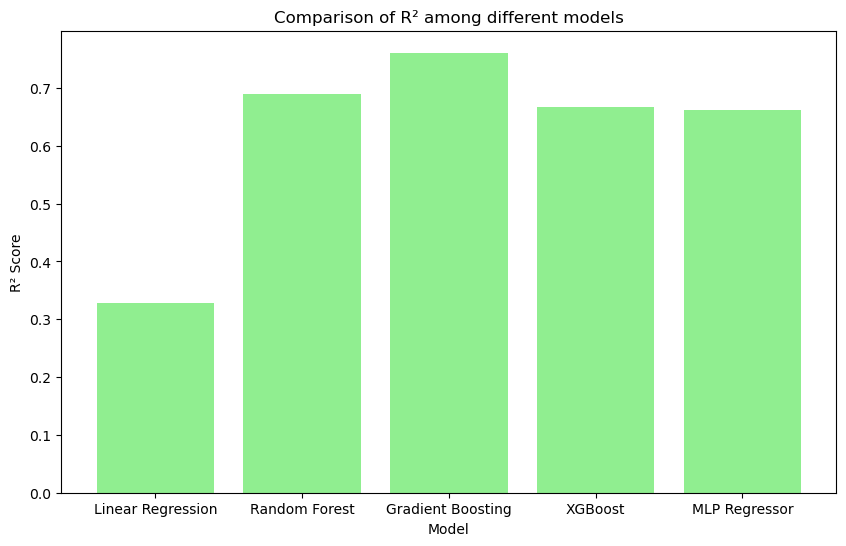

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R²'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of R² among different models')
plt.show()


Comparação das Predições

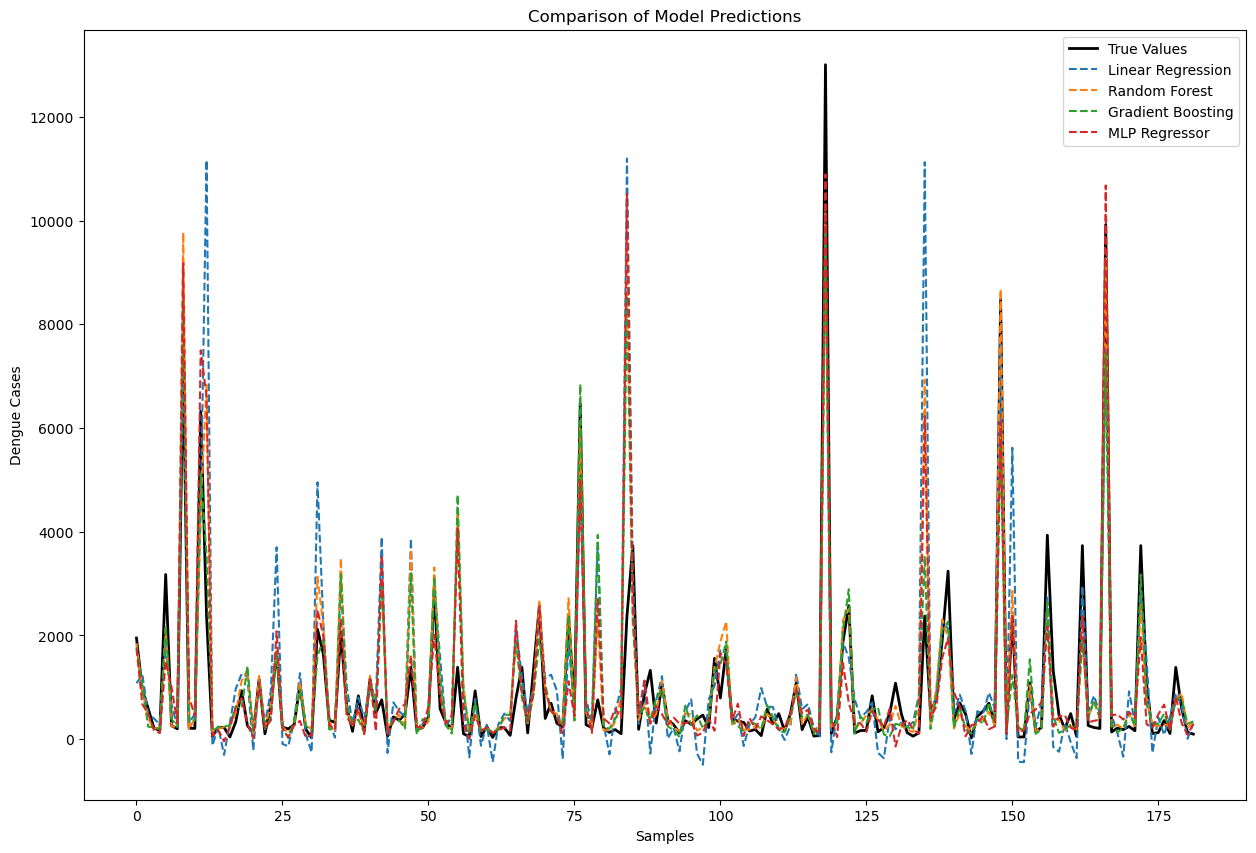

In [72]:
plt.figure(figsize=(15, 10))

# Valores reais
plt.plot(y_test.values, label='True Values', color='black', linewidth=2)

# Predições dos modelos
plt.plot(y_pred, label='Linear Regression', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(y_pred_gb, label='Gradient Boosting', linestyle='--')
plt.plot(y_pred_mlp, label='MLP Regressor', linestyle='--')

plt.xlabel('Samples')
plt.ylabel('Dengue Cases')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()


Gráfico Comparativo de Modelos

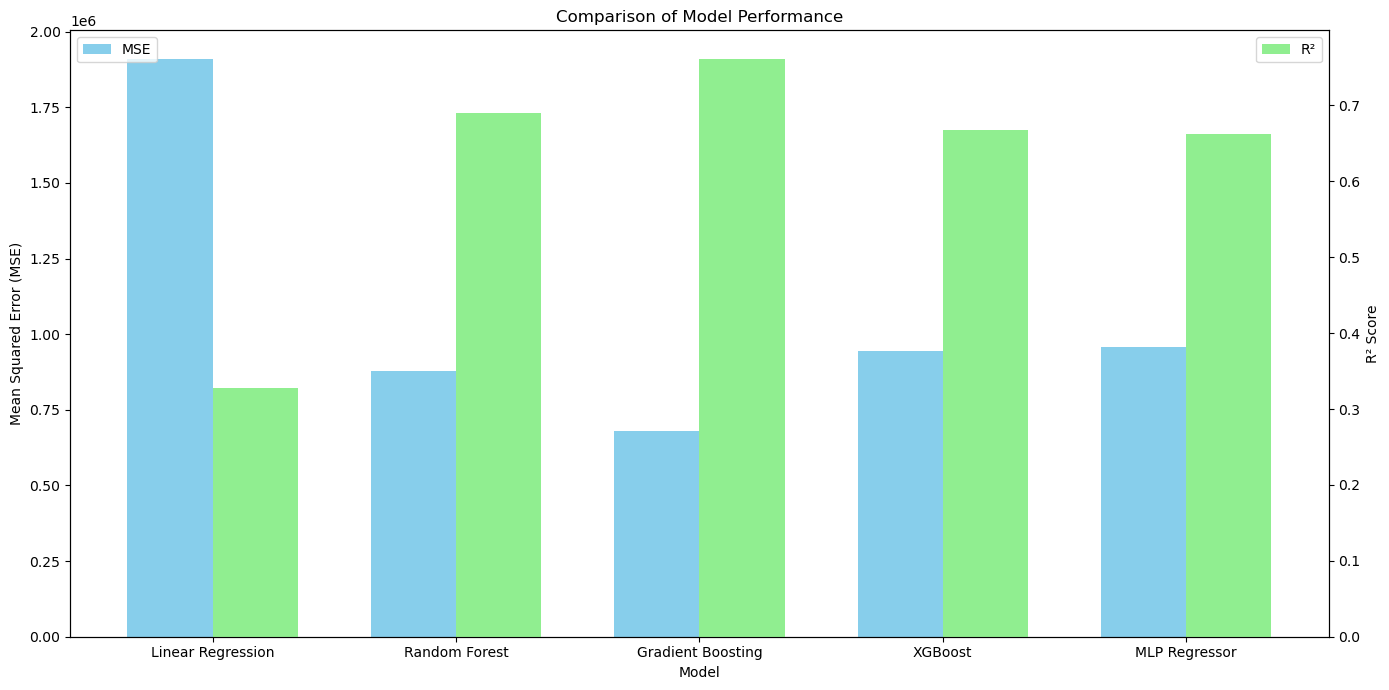

In [41]:
# Dados para o gráfico
models = results_df['Model']
mse_values = results_df['MSE']
r2_values = results_df['R²']

x = np.arange(len(models))  # Posições das barras
width = 0.35  # Largura das barras

fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para MSE
bars1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='skyblue')

# Gráfico de barras para R² (em uma segunda escala y)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, r2_values, width, label='R²', color='lightgreen')

# Adicionar títulos e rótulos
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax2.set_ylabel('R² Score')
ax1.set_title('Comparison of Model Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar o gráfico
fig.tight_layout()
plt.show()
